In [2]:
import csv
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import sys
print(sys.path)

['', '/Users/Gusto/anaconda/lib/python3.5/site-packages/pycountry-16.11.27.1-py3.5.egg', '/Users/Gusto/anaconda/lib/python35.zip', '/Users/Gusto/anaconda/lib/python3.5', '/Users/Gusto/anaconda/lib/python3.5/plat-darwin', '/Users/Gusto/anaconda/lib/python3.5/lib-dynload', '/Users/Gusto/anaconda/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg', '/Users/Gusto/anaconda/lib/python3.5/site-packages/setuptools-23.0.0-py3.5.egg', '/Users/Gusto/anaconda/lib/python3.5/site-packages', '/Users/Gusto/anaconda/lib/python3.5/site-packages/aeosa', '/Users/Gusto/anaconda/lib/python3.5/site-packages/IPython/extensions', '/Users/Gusto/.ipython']


In [4]:
path = 'hillary-clinton-emails/Emails.csv'
table_text = pd.read_csv(path)

Have a look at the name of the columns we have ...

In [5]:
table_text.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

# 1. WordCloud

After a quick look, we find that will work with column 'ExtractedBodyText'. We decided to not use 'ExtractedSubject' column, because we often already have it in the ExtractedBodyText, and it added typical email words like 'Re', 'Fw' that we don't want in our wordcloud. 


On the next cell, we group in a single string variable all the words. We have realised that all mails with less than 10 characters are useless.

In [6]:
text = ''
for i in np.arange(table_text.shape[0]):
    if (len(str(table_text.ExtractedBodyText[i])) > 10):
        text += ' ' + str(table_text.ExtractedBodyText[i])

### a) WordCloud by default generated by the WordCloud library

In [179]:
print(STOPWORDS)

{'', "wouldn't", 'being', 'from', 'they', "where's", 'yours', 'was', 'www', 'an', 'during', "i'll", 'under', 'that', "she's", 'you', 'hers', 'yourselves', 'we', "he'll", 'do', 'is', 'of', 'at', "let's", 'how', 'yourself', 'on', "you're", 'themselves', 'com', "couldn't", 'myself', "what's", "isn't", 'own', 'than', "he'd", 'were', "they'll", 'between', 'are', 'their', "weren't", 'does', 'the', 'just', 'nor', "how's", 'there', 'can', 'if', "i'm", 'against', "it's", 'over', 'be', "aren't", 'for', 'each', "there's", 'down', "mustn't", "they'd", 'other', 'those', 'with', 'did', "why's", 'been', 'again', 'and', 'ours', 'here', 'to', 'i', 'more', 'which', 'until', 'because', 'once', "shouldn't", 'into', 'doing', 'himself', 'not', 'out', 'these', "when's", "can't", 'same', 'through', 'where', 'all', "didn't", 'why', 'before', 'it', "wasn't", 'had', "here's", 'by', 'what', "won't", 'him', "she'll", 'too', 'me', 'could', "i'd", "she'd", 'them', 'below', 'about', 'theirs', 'herself', 'after', 'suc

In [180]:
image = Image.open("hillary-logo.png")
image_mask = np.array(image)

In [181]:
wc = WordCloud(background_color="white", max_words=2000, mask=image_mask,
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(text)
wc.to_file("wc1.png")

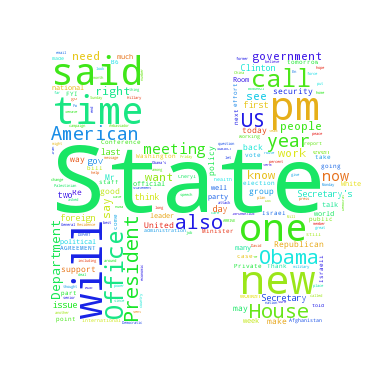

In [182]:
Image.open("wc1.png")

### Discussion:

Some unrelevant words and especially verbs as 'will', 'said', 'known', 'need' or 'made'. Also very usual nouns: 'day', 'also', 'two' or 'House'.

Vocabulary of emails structures: 'pm' (hour), 'Fw', 'Re' that are not present in the STOPWORD list given by WordCloud.

We can see also 'government' and 'gov' that could be stemmed. This is not done by WordCloud neither

### b) word cloud generated by a personnalized standard text pre-processing 

In [183]:
import nltk #, pprint
# au début j'ai utilisé lui...
from nltk import word_tokenize
#nltk.download('all')

In [152]:
import re

In [153]:
# Mais enfait lui est mieux ...
from nltk.tokenize import RegexpTokenizer

We also add manually stop_words adapted to our context.

In [154]:
from nltk.corpus import stopwords
email_list = ['fw', 're', 'pm', 'am']
usual_words = ['would','say', 'think', 'know', 'good', 'bad', 'talk', 'said', 'have', 'had','got', 'call', 'get', 'also', 'want', 'see']
days = ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september','october','november','december']
perso_stopwords = stopwords.words("english") + email_list + days + months + single_characters + usual_words
stop_words = set(perso_stopwords)

In [155]:
lower_text = text.lower()

In [156]:
without_symbols = re.sub("[^a-zA-Z]", " ", lower_text)  

In [157]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(without_symbols)

In [158]:
type(tokens)

list

#### filtering

personnalized stopwords list.

In [159]:
without_stopwords = [words for words in tokens if not words in stop_words]

We remove single characters.

In [160]:
filtered_words = [words for words in without_stopwords if len(words) != 1]

#### stemming:
To convert all words to their root

In [161]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [162]:
stem = [lancaster.stem(t) for t in filtered_words]

In [166]:
filtered_words[100], stem[100]

('agreement', 'agr')

In [167]:
filtered_words[311], stem[311]

('commentators', 'com')

We did not use stemming because sometimes, we can't recognize words when they are cutted. Example : agreement -> agr ( 'agr' could be agriculture) or commentators -> com ( 'com' could be communication, commercial ..)

#### lemmatization : 

Plural and singular forms merged, conjugate verbs changed to their usual form..

In [168]:
lem = nltk.WordNetLemmatizer()
lemmed_text = [lem.lemmatize(t) for t in filtered_words]

In [169]:
new_text = " ".join(lemmed_text)

In [190]:
wc = WordCloud(background_color="black", max_words=2000, mask=image_mask,
               stopwords=STOPWORDS, max_font_size= 1000)
# generate word cloud
wc.generate(new_text)
wc.to_file("wc2.png")

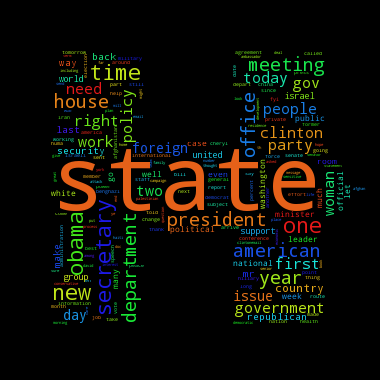

In [191]:
Image.open("wc2.png")

### Discussion:

We have more interesting terms like 'president', 'republican', 'obama', which were already in the first wordcloud, and  'issue', 'policy', 'security', 'country', 'foreign' that are new words. Finally, the more-used words are no more 'Pm' or 'Fw'.

# 2. sentiment analysis

# 3. use of gensim library

In this section, we will run a statistical model called the 'Latent Dirichlet Model' to discover the abstracts topics that occurs in the collection of e-mails we have.

In [125]:
from gensim import corpora, models, similarities
import re

Same text prepocessing as in question 1 for the wordcloud, but this time we do it separatly for each e-mails ( Unlike question 1, where all e-mails were first concatenated into one string before text-prepocessing )

In [126]:
documents = []
for i in np.arange(table_text.shape[0]):
    if (len(str(table_text.ExtractedBodyText[i])) > 50):
        string = str(table_text.ExtractedBodyText[i])
        clean_string = re.sub("[^a-zA-Z]", " ",string.lower())
        documents.append(clean_string)
        


In [127]:
final_doc = [[lem.lemmatize(word) for word in document.split() if word not in stop_words] for document in documents]

The Dictionary variable is necessary for running the Latent Dirichlet Allocation model estimation.

In [128]:
dictionary = corpora.Dictionary(final_doc)
corpus = [dictionary.doc2bow(text) for text in final_doc]

We ran the algo for 5, 15 and 50 topics. We realized that the more topics we use, the more useless topics are selected. The best is probably with 5 topics.

#### 5 topics :

We notice one topic that represent well the main subjects of a presidential campain : 'Diplomacy', 'conflict', 'united' and 'state', 'nuclear', 'effort'.
One that represent the busy schedule of Secretary Clinton : 'office', 'arrive', 'route', 'conference', 'meeting', 'room'.

In [131]:
lda_1 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, passes = 3)

In [132]:
lda_1.print_topics(6)

[(0,
  '0.027*"state" + 0.019*"gov" + 0.009*"com" + 0.008*"clintonemail" + 0.007*"tomorrow" + 0.007*"pls" + 0.007*"hrod" + 0.006*"cheryl" + 0.006*"today" + 0.006*"huma"'),
 (1,
  '0.016*"state" + 0.008*"diplomacy" + 0.007*"new" + 0.006*"force" + 0.006*"conflict" + 0.006*"united" + 0.006*"department" + 0.006*"nuclear" + 0.006*"effort" + 0.005*"diplomat"'),
 (2,
  '0.031*"secretary" + 0.028*"office" + 0.018*"meeting" + 0.018*"room" + 0.013*"state" + 0.011*"department" + 0.011*"conference" + 0.010*"arrive" + 0.010*"en" + 0.010*"route"'),
 (3,
  '0.004*"u" + 0.004*"time" + 0.004*"american" + 0.004*"one" + 0.004*"woman" + 0.004*"mr" + 0.004*"new" + 0.004*"year" + 0.004*"bloomberg" + 0.004*"world"'),
 (4,
  '0.010*"obama" + 0.005*"president" + 0.005*"republican" + 0.004*"american" + 0.004*"one" + 0.004*"party" + 0.004*"house" + 0.004*"new" + 0.004*"year" + 0.003*"people"')]

#### 15 topics
-Still interesting topics: - 'private organization' topic : number 2 -> 'today', 'forgot', 'flight', 'come', 'back', 'tommorrow'.
Or 'International conflict' topic : number 14 -> 'iraq', 'civilian', 'conflict', 'military', 'cheryl' (American Lawyer), 'force'.

But there are some unrelevant topics: number 4 or repetitive: number 5 also concern 'private organization'. Topic number 11 does not really make sense. This is more random subjects put together -> 'email', 'please', 'state', 'kosovo', 'today', 'limited', 'back', 'thank'...


In [133]:
lda_2 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15)

In [134]:
lda_2.print_topics(15)

[(0,
  '0.007*"palin" + 0.005*"time" + 0.005*"last" + 0.005*"vote" + 0.004*"cloture" + 0.004*"u" + 0.004*"one" + 0.004*"state" + 0.004*"day" + 0.004*"told"'),
 (1,
  '0.014*"mod" + 0.007*"state" + 0.006*"conflict" + 0.006*"israel" + 0.005*"american" + 0.005*"right" + 0.005*"government" + 0.004*"people" + 0.003*"prevention" + 0.003*"united"'),
 (2,
  '0.005*"forgot" + 0.005*"today" + 0.005*"state" + 0.004*"flight" + 0.004*"tell" + 0.004*"duck" + 0.004*"thx" + 0.004*"back" + 0.003*"tomorrow" + 0.003*"come"'),
 (3,
  '0.008*"state" + 0.005*"party" + 0.005*"agreement" + 0.004*"one" + 0.004*"right" + 0.004*"government" + 0.003*"new" + 0.003*"ireland" + 0.003*"time" + 0.003*"northern"'),
 (4,
  '0.025*"state" + 0.015*"gov" + 0.008*"com" + 0.008*"clintonemail" + 0.007*"hrod" + 0.005*"pls" + 0.005*"make" + 0.004*"one" + 0.004*"huma" + 0.004*"fyi"'),
 (5,
  '0.033*"secretary" + 0.026*"office" + 0.019*"state" + 0.018*"meeting" + 0.016*"room" + 0.015*"department" + 0.013*"treaty" + 0.011*"confere

#### 50 topics 
Difficult to find an relevant topic..

Maybe the number 44 that shows that Secretary Clinton was doubting the security and the confidentiality of it's private e-mail adress.. -> 'sent', 'via', 'blackberry', 'release', 'declassify'

In [136]:
lda3 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=50)

In [149]:
lda3.print_topics(100)[44]

(44,
 '0.038*"sent" + 0.025*"via" + 0.018*"blackberry" + 0.016*"release" + 0.016*"part" + 0.013*"declassify" + 0.013*"sid" + 0.012*"docx" + 0.010*"sbwhoeop" + 0.010*"university"')